# 1. 해시 테이블 기초

- 해시 테이블 생성

In [ ]:
book = dict() # 해시 테이블 생선(딕셔너리 생성)
#book = {} 랑 같음 (일반적으로 우리가 많이 쓰는 방식)


In [ ]:
type(book)

dict

- 해시 테이블에 키(`key`)와 값(`value`) 입력

In [ ]:
book["apple"] = 0.67  # 키 값으로 "apple"의, 벨류로는 0.67

In [ ]:
book["milk"] = 1.49

In [ ]:
book["avocado"] = 1.49

In [ ]:
book

{'apple': 0.67, 'milk': 1.49, 'avocado': 1.49}

- 해시 테이블 값 호출 하기 
- 키(`key`) 값을 이용해서 불러오기  

In [ ]:
book["avocado"] # O(1) 읽기 (기본)

1.49

In [ ]:
book["pineapple"]        # 키가  존재하지 않으면? KeyError: 'pineapple' 발생

KeyError: ignored

In [ ]:
book.get("apple")        # 많이 쓰는 방법 .get()함수 

0.67

In [ ]:
print(book.get("pineapple"))

None


In [ ]:
phone_book = {}          # phone_book = dict() 랑 같음


In [ ]:
type(phone_book)

dict

In [ ]:
# 번호 추가
phone_book["jenny"] = 8675309
phone_book["emergency"] = 911

In [ ]:
phone_book["jenny"]

8675309

In [ ]:
# 같은 것 
same_phone_book = {
    "jenny" : 8675309,
    "emergency" : 911,
}

In [ ]:
same_phone_book["jenny"]

8675309

- 투표 예제 

In [ ]:
voted = {}


In [ ]:
value = voted.get("tom")

- `get` 함수는 해시 테이블 안에 "tom"이라는 키가 있으면 그 키에 해당하는 값을 반환합니다.
- 만약 키가 없으면 None을 반환 합니다.
- 이 방법으로 그 사람이 이미 투표했는지 확인 할 수 있습니다!

In [ ]:
print(value)

None


In [ ]:
def check_voter(name):
    if voted.get(name):
        print("쫓아내세요!")
    else:
        voted[name] = True # name에 해당되는 Value 값을 True로 입력
        print("투표하게 하세요!")

In [ ]:
check_voter("tom")

투표하게 하세요!


In [ ]:
check_voter("mike")

투표하게 하세요!


In [ ]:
check_voter("mike")        # 중복 투표 하려는 사람

쫓아내세요!


- 캐시 예제

In [ ]:
cache = {}


In [ ]:
def get_page(url):
    if cache.get(url):
        return cache[url]       # 캐싱된 자료를 전송
    else:
        data = get_data_from_server(url)
        cache[url] = data
        return data

# 2. 해시 테이블 심화

## 2.1 해싱

- 해시 테이블은 **배열**을 이용해서 생성 합니다. (아래의 예에서는 11개 짜리의 배열을 이용하여 해시 테이블을 만들어 보겠습니다.)
- 처음에 해시테이블에는 항목이 없기 때문에 아래와 같이 비어있습니다.
- 아래의 그림은 크기 $m = 11$의 해시 테이블을 보여줍니다. 
- 즉, 테이블에는 0에서 10까지의 슬롯이 $m$ 개 있습니다.

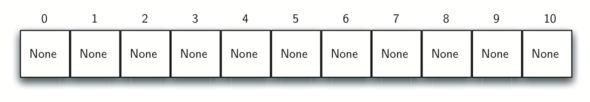

- 항목과 해시 테이블에서 해당 항목이 속한 슬롯 간의 매핑을 해시 함수라고합니다.
    - $y = f(x)$, $y=$ 슬롯, $x =$항목, $f()=$ 해시 함수 
- 해시 함수는 컬렉션의 모든 항목을 가져 와서 $0$과 $m-1$ 사이의 슬롯 범위내의 정수를 반환합니다.
- 정수 항목 54, 26, 93, 17, 77 및 31이 있다고 가정합니다.
- **첫 번째 해시 함수**는 "나머지 함수"라고 하며 항목을 가져 와서 테이블 크기로 나눠 나머지를 해시 값 $(h(item)=item\%11)$으로 반환합니다.




|Item|Hash Value|
|---|---|
|54 |10|
|26	|4|
|93	|5|
|17	|6|
|77	|0|
|31	|9|

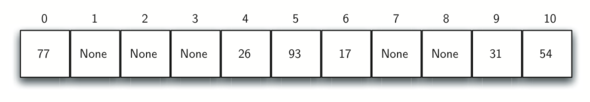

- 이제 11 개의 슬롯 중 6 개가 점유되었습니다. 
- 이를 load factor(사용률) 라고하며 일반적으로 $\lambda  = \frac{numberofitems}{tablesize}$로 표시됩니다. 
- 이 예에서는 $\lambda = \frac{6}{11}$입니다.

### 2.1.1 항목 검색

- 이제 항목을 검색하려면 해시 함수를 사용하여 항목의 슬롯 이름(`key`)을 계산 한 다음 해시 테이블이 있는지 확인하십시오.
- 이 검색 연산은 $O(1)$입니다. 
- 해시 값을 계산 한 다음 해당 위치에서 해시 테이블을 인덱싱하는 데 일정한 시간(상수시간)이 필요하기 때문입니다.

- 이 기술은 각 항목이 해시 테이블의 고유 한 위치에 매핑되는 경우에만 작동 할 것입니다. **(고유성)**
- 그렇지만 현실적으로 불가능하죠? 예를 들어, 44가 컬렉션의 다음 항목 인 경우 해시 값은 0 $(44 \% 11 == 0)$입니다.
- 이미 77이 있고, 그 해시 값이 0이므로 문제가 발생합니다. 

- 이것을 **충돌**이라고합니다 

## 2.2 해시 함수

- 각 항목을 고유 슬롯으로 매핑하는 해시 함수를 **완벽한 해시 함수**라고합니다.
- 만약, 항목(item)을 알고 컬렉션이 변경되지 않으면 완벽한 해시 함수를 생성 할 수 있습니다.
- 그러나 안타깝게도, 컬렉션은 변동이되며 항목은 임의로 저장되기 때문에 완벽한 해시 함수를 구현하는것은 불가능 합니다.
- 그러나 해시 함수가 완벽하지 않아도 우리는 컬렉션을 검색을 효율적으로 할 수 있습니다.

- **1차적인 방법은 컬렉션보다 큰 사이즈의 해시 테이블을 이용하는 것 입니다.**
- 이렇게하면 각 항목에 고유 슬롯이 생깁니다. 이는 적은 수의 항목에 대해서는 실용적이지만, 가능한 항목의 수가 많으면 적합하지 않습니다.
    - 예를 들어 항목이 9 자리 사회 보장 번호 인 경우이 방법에는 거의 10 억 개의 슬롯이 필요합니다. 
    - 우리가 단지 25 명의 학생들을위한 자료를 저장하기를 원한다면, 우리는 엄청난 양의 메모리를 낭비하게 될 것입니다.

### 우리의 현실적인 방안

- 우리의 목표는 **충돌 횟수를 최소화**하고, **계산하기 쉽고** 해시 테이블에 **항목을 균등하게 분배**하는 해시 함수를 만드는 것입니다.
- 해시함수를 만드는 일반적인(General)방법을 몇가지 살펴 봅시다.

#### 2.2.1 The folding method

- 이 방법은 항목을 같은 크기의 조각으로 나누는 것으로 시작됩니다.
- 그런 다음이 각 조각을 합쳐 결과 해시 값을 제공합니다.
- 예를들어, 항목이 전화 번호 436-555-4601 인 경우 2개씩 번호를 나눠서 (43,65,55,46,01) 개의 그룹으로 나눕니다. 
- 그럼 다음 각 조각을 합쳐서 43 + 65 + 55 + 46 + 01, 우리는 210을 얻습니다. 
- 만약 해시 테이블에 11 개의 슬롯이 있다고 가정하면, 11으로 나누고 나머지를 유지하는 추가 단계를 수행해야합니다.
- 이 경우 $210 \% 11$은 1이므로 전화 번호 436-555-4601은 슬롯 1에 해시됩니다. 

#### 2.2.2 mid-square method

- 먼저 항목을 제곱 한 다음 결과 숫자의 일부를 추출합니다.
- 예를 들어, 항목이 44 인 경우 먼저 $44^2 = 1,936$을 계산합니다. 
- 가운데 두 자리 인 93을 추출하고 나머지 단계를 수행하면 5 ($93 \% 11$)가됩니다.

|Item|	Remainder|	Mid-Square|
|---|---|---|
|54|	10|	3
|26|	4	|7
|93|	5	|9
|17	|6	|8
|77	|0	|4
|31	|9	|6

#### 2.2.3 문자열 해시

- 문자열과 같은 문자 기반 항목에 대한 해시 함수를 만들 수도 있습니다. 
- "cat"이라는 단어는 서수 값의 순서로 생각할 수 있습니다.

In [ ]:
ord('c')

99

In [ ]:
ord('a')

97

In [ ]:
ord('t')

116

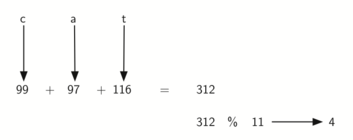

In [ ]:
def hash(astring, tablesize):
    sum = 0
    for pos in range(len(astring)):
        sum = sum + ord(astring[pos])

    return sum%tablesize

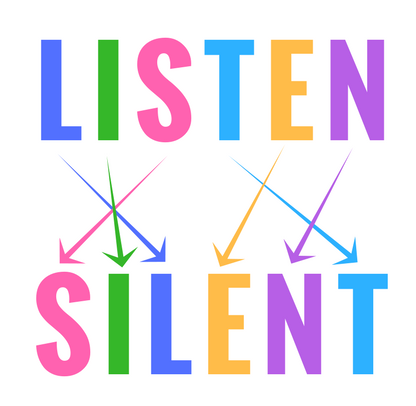

- 위의 경우(아나그램) 문제 발생.
- 해결방법? 위치에 따른 가중치?

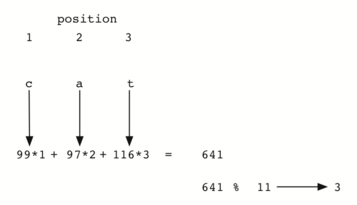

- 우리는 다양한 방식으로 해시 함수를 만들 수 있지만 중요한 것은 **상수시간의 비용** 이겠죠?
- 만약 해시 함수가 너무 복잡하다면, 이진 탐색이나 순차 탐색을 하는 경우보다 해시 함수를 계산하는데 더 많은 시간 과 비용이 발생 할 것입니다!

## 2.3 충돌 해결책

- 완벽한 해시 함수는 불가능 하기 때문에 충돌이 일어날 경우 이를 적절하게 저장하는 방법이 필요합니다.
- 한가지 방법은, 충돌이 일어난 항목을 저장할 비어있는 슬롯을 찾는 것 입니다.
- 이렇게 하는 간단한 방법은 원래 해시 값에서 첫번째 비어있는 가까운 슬롯을 찾는 것 입니다.
- 최악의 경우 해시 값의 바로 왼쪽에 저장 될 수도 있습니다.

### 2.3.1 **open addressing** 

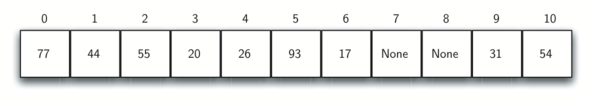

- (54,26,93,17,77,31,44,55,20)

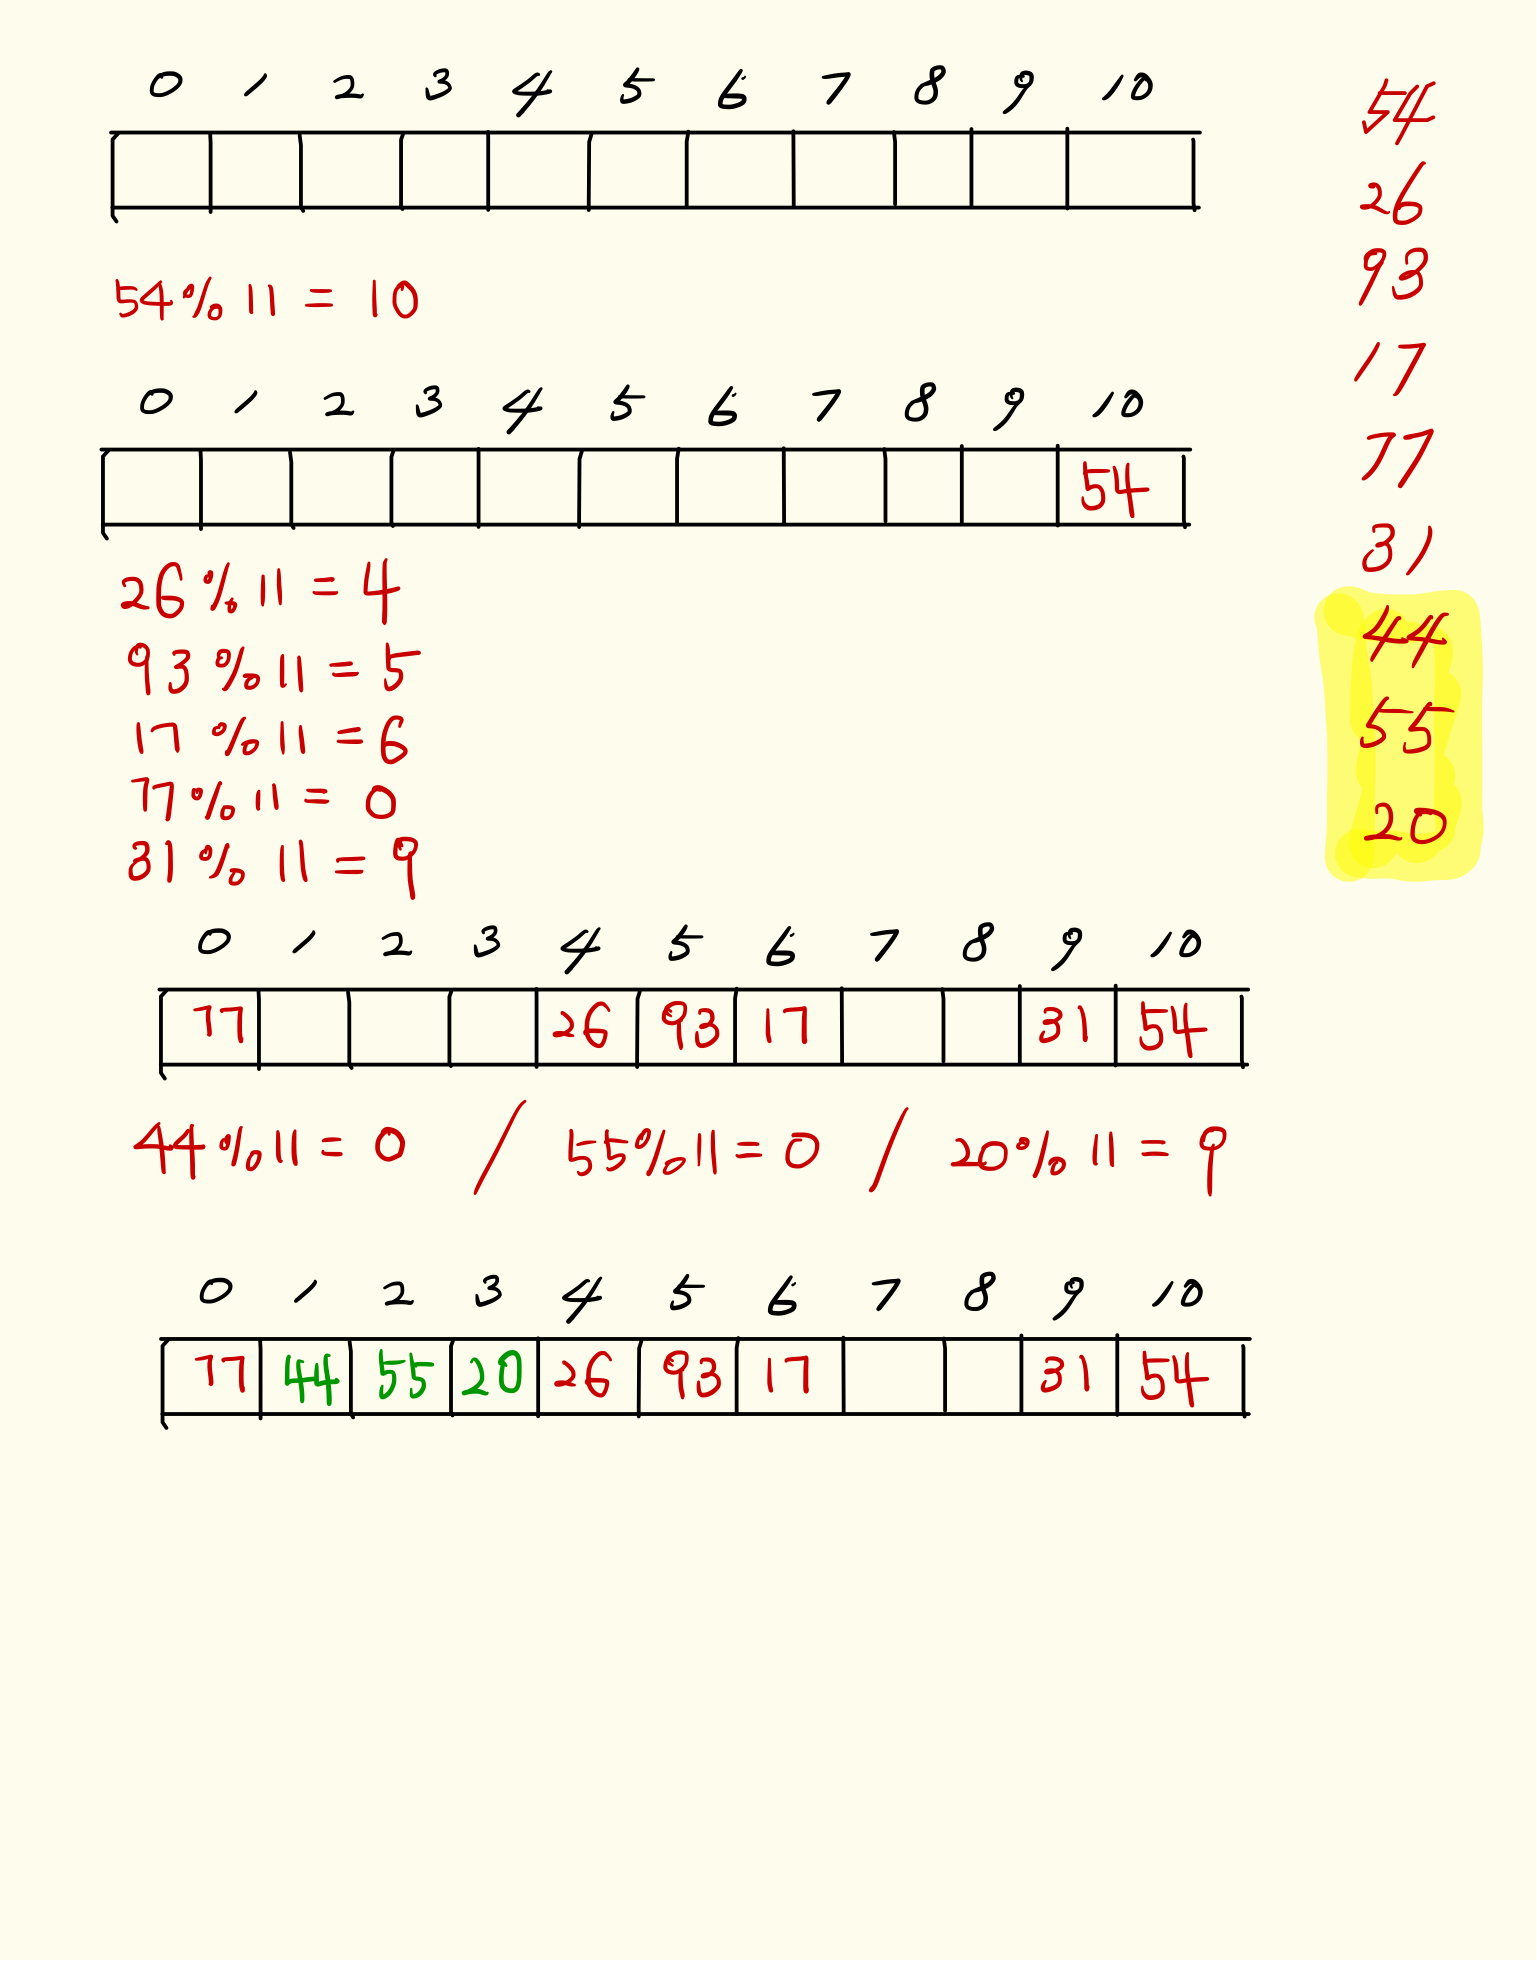

- **그럼 나중에 찾을때는 어떻게 찾아야 할까??**

- 우리가 아이템 93을 찾아보기를 원한다고 가정 해 봅시다. 
- 해시 값을 계산할 때, 우리는 5를 얻습니다. 
- 슬롯 5를 들여다 보면 93이 나오고 True를 반환 할 수 있습니다.

- 우리가 20을 찾고 있다면? 
- 이제 해시 값은 9이고 슬롯 9는 현재 31을 유지하고 있습니다. 
- 충돌이 있었을 가능성이 있으므로 False를 반환 할 수 없습니다. 
- 우리는 이제 항목 10을 시작으로 항목 20을 찾거나 빈 슬롯을 찾을 때까지 순차적 검색을 수행해야합니다.



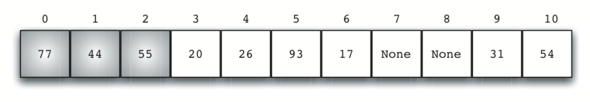

- **open addressing의 문제점: 클러스터링**

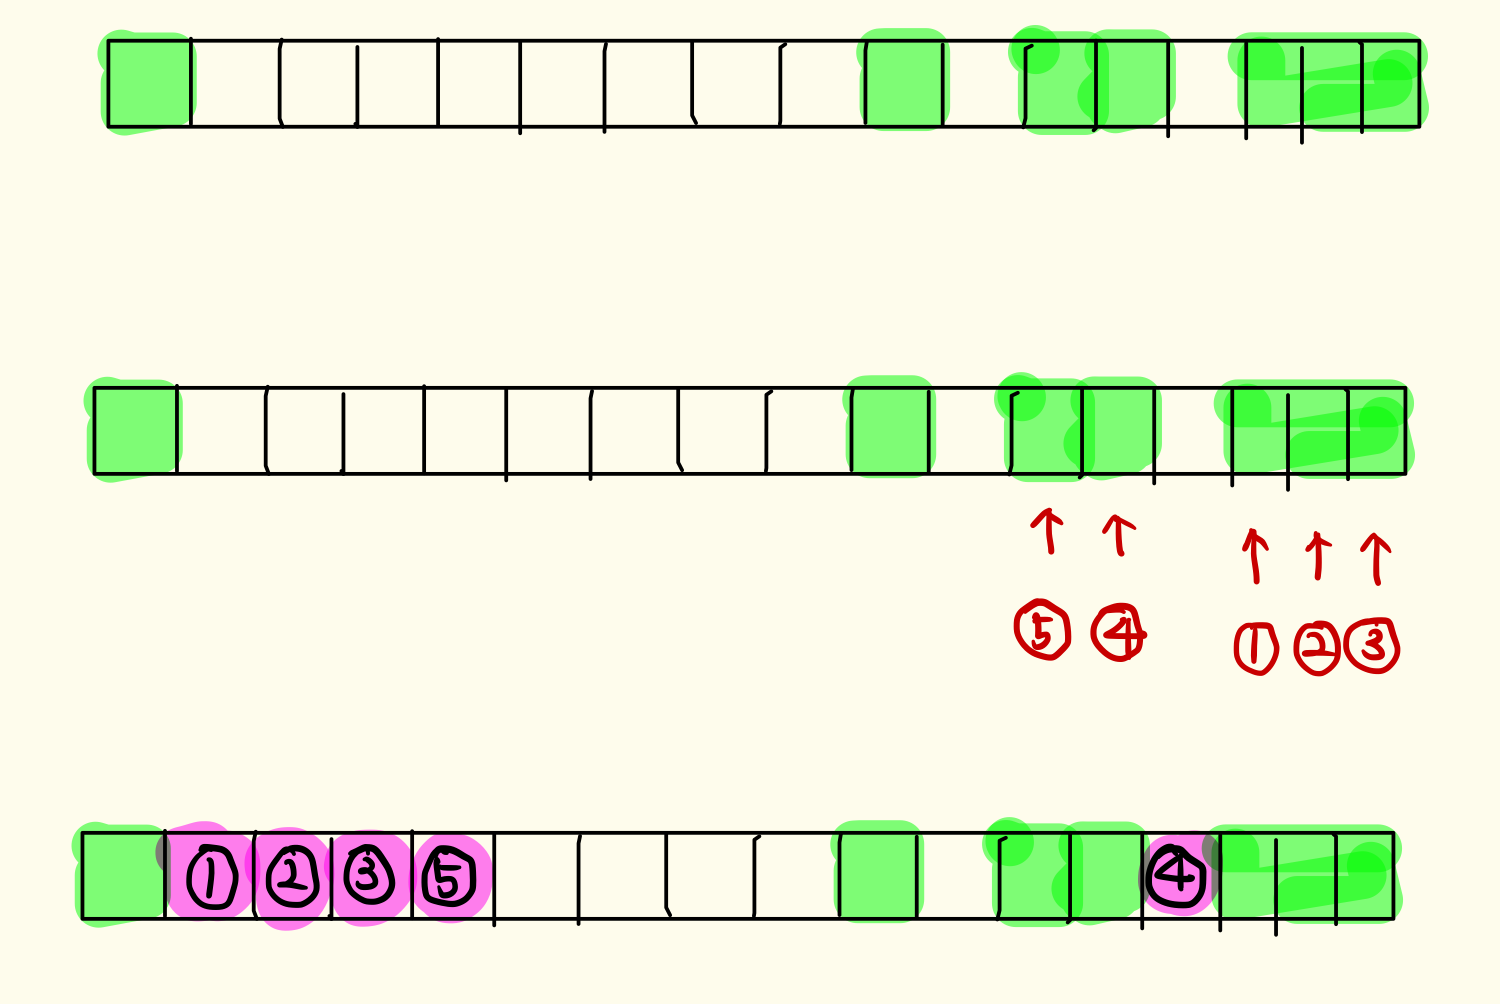

- **클러스터링 문제를 해결하는 방법은??**

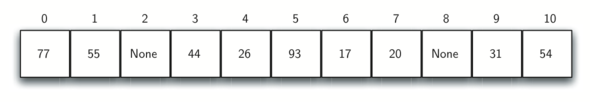

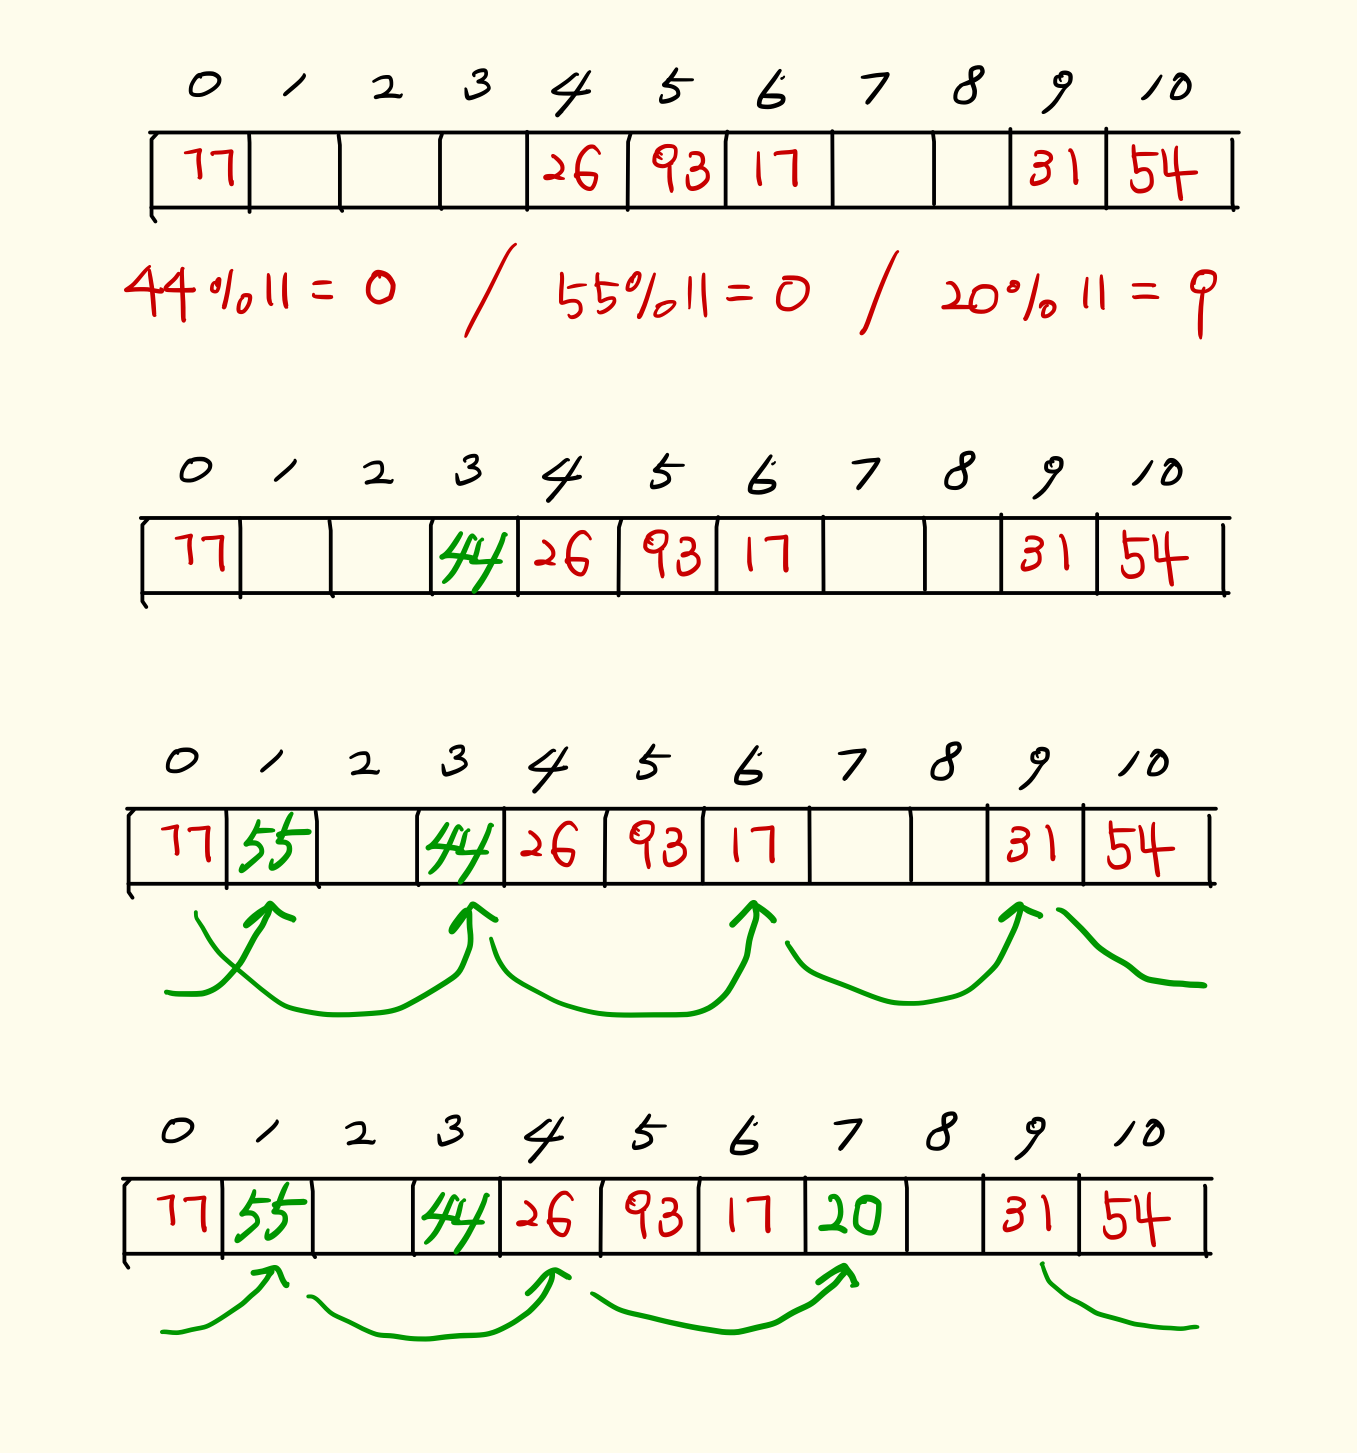

### 2.3.2 rehashing(리해싱)

`newhashvalue=rehash(oldhashvalue)`

`rehash(pos)=(pos+3)%sizeoftable`

` rehash(pos)=(pos+skip)%sizeoftable`

- "건너 뛰기"의 크기는 테이블의 모든 슬롯이 결국 방문되는 크기 여야합니다.

- 그렇지 않으면 테이블의 일부가 사용되지 않습니다.

- 이를 위해 테이블 크기를 소수로 제안하는 것이 좋습니다. 이것이 우리의 예제에서 11을 사용한 이유입니다.

- 선형 프로빙(linear probing) 아이디어의 변형을 **2차 프로빙(quadratic probing)**이라고합니다.

- 상수 "건너 뛰기"값을 사용하는 대신 해쉬 값을 1, 3, 5, 7, 9 등으로 증가시키는 rehash 함수를 사용합니다.

- 즉, 첫 번째 해시 값이 h이면 연속 값은 h + 1, h + 4, h + 9, h + 16 등입니다.

- 즉, 2 차 탐색은 연속적인 완벽한 사각형으로 구성된 건너 뛰기를 사용합니다. 그림 11은이 기술을 사용하여 배치 한 후의 예제 값을 보여줍니다.

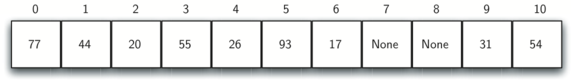

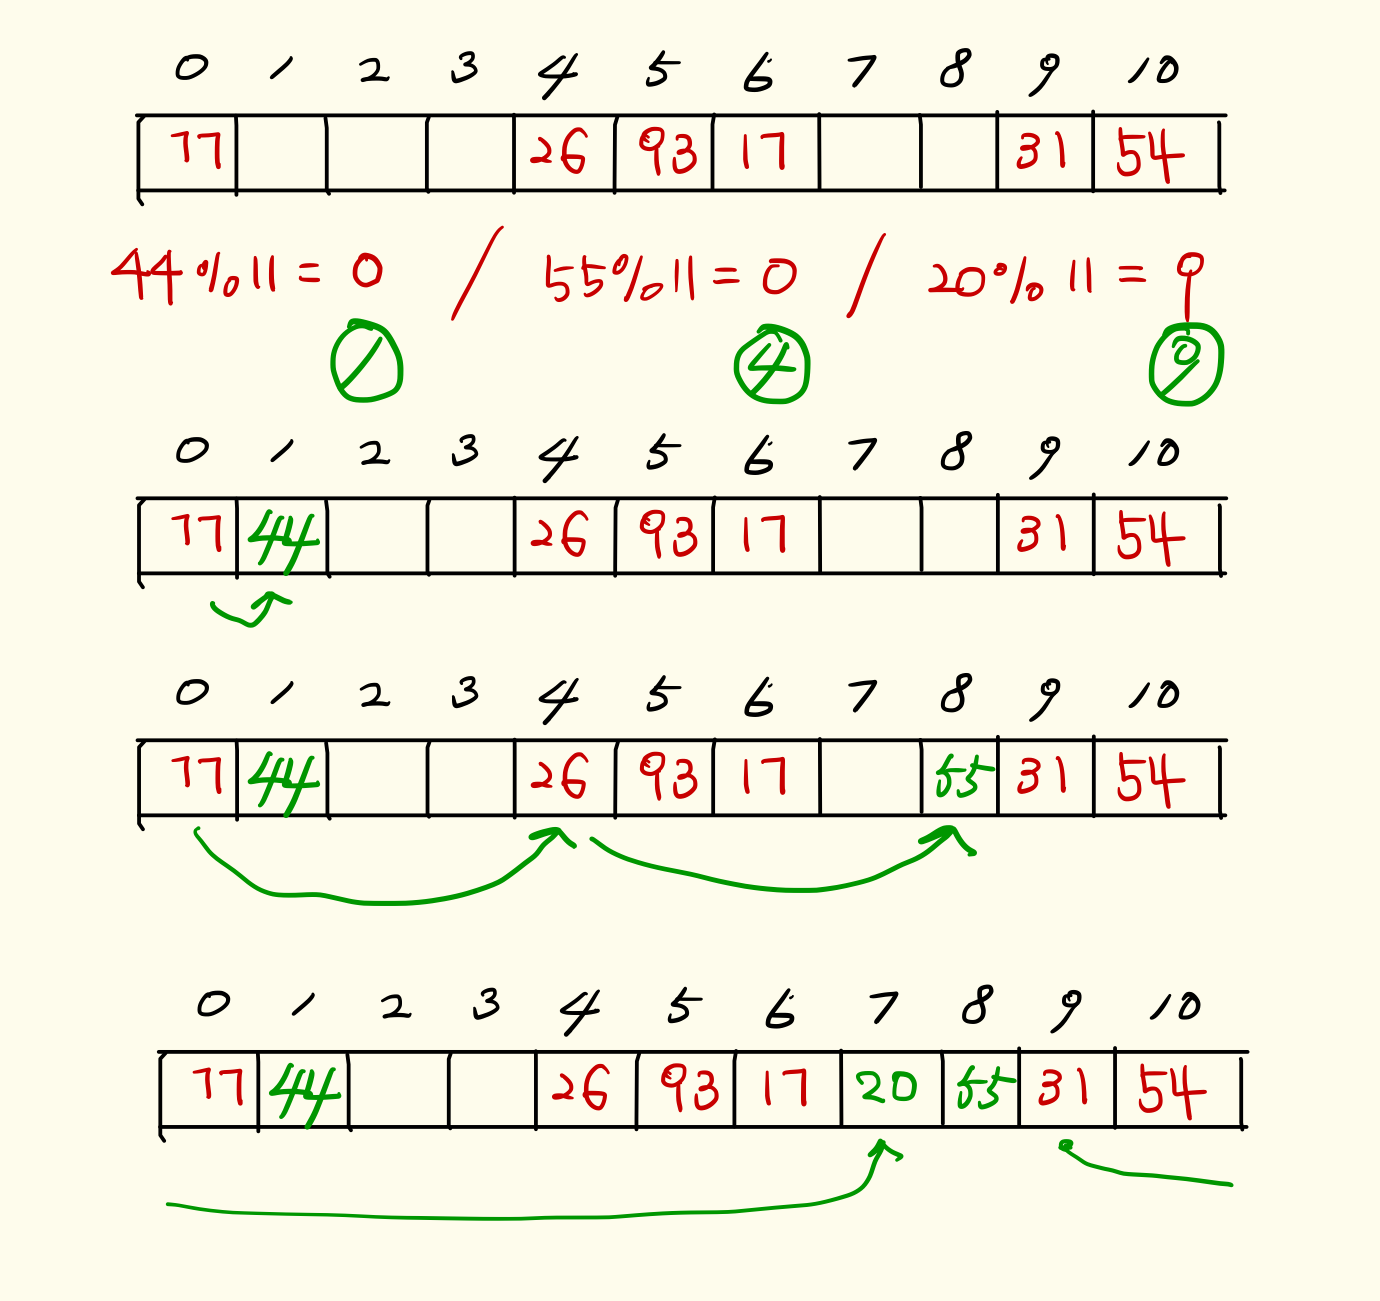

### 2.3.3 Chaining

- 충돌을 피하는 또다른 방법(체이닝)

-  체인을 사용하면 많은 항목이 해시 테이블의 동일한 위치에 존재할 수 있습니다.

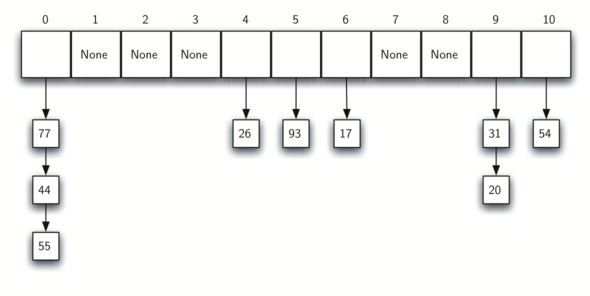

## 2.4 해시 테이블 구현 (from Scratch)

- 파이썬의 딕셔너리를 이용

- 우리가 만들 함수
    - `Map()`,  맵 생성
    - `put(key,val)`, 데이터 삽입
    - `get(key)` , 키가 주어지면 맵에 저장된 값을 반환하고 그렇지 않으면 `None`을 반환합니다.
    - `del`, 키와 값을 삭제 `del map[key]` 
    - `len()`
    - `in`, 지정된 키가 맵에 있으면, 맵 내의 서식 키의 문장을 `True`, 그렇지 않은 경우는 `False`를 돌려줍니다.
    

In [ ]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))

        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data  #replace
            else:
                nextslot = self.rehash(hashvalue,len(self.slots))
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot,len(self.slots))
                
                if self.slots[nextslot] == None:
                    self.slots[nextslot] = key
                    self.data[nextslot] = data
                else:
                    self.data[nextslot] = data # replace

    def hashfunction(self,key,size):
         return key % size

    def rehash(self,oldhash,size):
        return (oldhash+1)%size
    
    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))

        data = None
        stop = False
        found = False
        position = startslot
        while self.slots[position] != None and not found and not stop:
            if self.slots[position] == key:
                found = True
                data = self.data[position]
            else:
                position=self.rehash(position,len(self.slots))
                if position == startslot:
                    stop = True
        return data

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)

In [ ]:
H=HashTable()

In [ ]:
type(H)

__main__.HashTable

In [ ]:
H[54]="cat"
H[26]="dog"
H[93]="lion"
H[17]="tiger"
H[77]="bird"
H[31]="cow"
H[44]="goat"        # rehash
H[55]="pig"
H[20]="chicken"



In [ ]:
H.slots

[77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]

In [ ]:
H.data

['bird',
 'goat',
 'pig',
 'chicken',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [ ]:
H[20]

'chicken'

In [ ]:
H[17]

'tiger'

In [ ]:
H[20] = 'duck'

In [ ]:
H[20]

'duck'

In [ ]:
H.data

['bird',
 'goat',
 'pig',
 'duck',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [ ]:
print(H[99])

None


### 2.4.1 해시 테이블 구현(파이썬 내부 자료구조 이용)

In [ ]:
class HashTable:
    def __init__(self):
        self.table = {} # 파이썬 딕셔너리 사용

    def put(self, key, value):
        self.table[key] = value

    def get(self, key):
        return self.table.get(key, None)

    def remove(self, key):
        if key in self.table:
            del self.table[key]

In [ ]:
# 해시테이블 생성
hash_table = HashTable()

# 값 추가
hash_table.put('apple', 10)
hash_table.put('banana', 20)
hash_table.put('cherry', 30)

# 값 조회
print(hash_table.get('apple'))    # 출력: 10
print(hash_table.get('banana'))   # 출력: 20
print(hash_table.get('cherry'))   # 출력: 30

# 값 삭제
hash_table.remove('banana')

# 삭제된 값 조회
print(hash_table.get('banana'))   # 출력: None

10
20
30
None


## 2.5. 해싱 분석

- 우리는 해시 함수가 $O(1)$으로 일정 시간 검색 기술을 제공한다고 살펴봤습니다.
- 그러나 실제로 충돌이 발생하기 때문에 일반적으로 간단하게 말할 수 없습니다.
- 해싱에 대한 완전한 분석은 우리의 학습 범위를 넘어가지만, 항목을 검색하는데 필요한 비교 횟수를 approximate 할 수 있습니다.(당연히 $O(1)$이 아니라 $\lambda$에 영향을 받겠죠)

- 해시 테이블 분석에서 가장 중요한 정보는 **사용율(이용률, load factor) $\lambda$** 입니다.
- 이론적으로 $\lambda$값이 작으면 당연히 출동 가능성은 줄어들며 항목이 속한 슬롯에 항목이 있을 가능성이 높습니다.
- 반대로 $\lambda$값이 크면, 해시 테이블이 가득 찬 것을 의미하며, 충돌도 많이 발생합니다.
- 즉, 충돌 해결을 위해서 빈 슬롯을 찾기 위한 과정이 많이 소요(비교 횟수 증가) 됩니다.
- Chaining(체이닝)을 사용하면(우리가 배운 방법) 충돌이 증감함에 따라서 각 체인의 항목의 수가 늘어 납니다.